# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [1]:
# -----------------  LIBRERÍAS  -----------------
import pandas as pd
import numpy as np
import random
from datetime import timedelta

# -----------------  PARÁMETROS  ----------------
np.random.seed(42)          # reproducibilidad
random.seed(42)

N_CLIENTES   = 15000         # cambia este valor si necesitas más filas
FECHA_CORTE  = pd.Timestamp("2025-04-01")   # fecha de referencia

PLATAFORMAS = {
    "Instagram": {
        "peso": 0.40,
        "age_min": 18, "age_max": 40,
        "inter_mean": 30,
        "ticket_min": 15, "ticket_max": 60,
        "cac_min": 10, "cac_max": 25
    },
    "Facebook": {
        "peso": 0.35,
        "age_min": 30, "age_max": 60,
        "inter_mean": 15,
        "ticket_min": 40, "ticket_max": 120,
        "cac_min": 15, "cac_max": 35
    },
    "TikTok": {
        "peso": 0.25,
        "age_min": 16, "age_max": 30,
        "inter_mean": 40,
        "ticket_min": 10, "ticket_max": 40,
        "cac_min": 5,  "cac_max": 20
    }
}

# -----------------  GENERACIÓN  ----------------
plat_names   = list(PLATAFORMAS.keys())
plat_weights = [PLATAFORMAS[p]["peso"] for p in plat_names]

clientes = []
for i in range(N_CLIENTES):
    # --- datos básicos ---
    id_cliente = f"C{i:05}"
    plataforma = random.choices(plat_names, weights=plat_weights, k=1)[0]
    cfg        = PLATAFORMAS[plataforma]

    edad   = np.random.randint(cfg["age_min"], cfg["age_max"] + 1)
    genero = random.choice(["F", "M"])

    # ingresos ~ edad + ruido
    base_income = np.random.normal(40_000, 15_000)
    ingresos    = int(max(18_000, base_income + (edad - 30) * 1_000 + np.random.normal(0, 8_000)))

    # interacciones y compras
    interacciones = np.random.poisson(cfg["inter_mean"])
    compras       = np.random.choice([1, 2, 3, 4, 5], p=[0.35, 0.30, 0.20, 0.10, 0.05])
    if interacciones > cfg["inter_mean"] * 1.2:
        compras += 1
    compras = min(compras, 6)

    # ticket promedio, gasto, CAC
    promedio_ticket = np.random.randint(cfg["ticket_min"], cfg["ticket_max"] + 1)
    total_gastado   = promedio_ticket * compras
    cac             = np.random.randint(cfg["cac_min"], cfg["cac_max"] + 1)

    # fechas
    dias_ult_compra      = np.random.randint(10, 180)
    fecha_ultima_compra  = FECHA_CORTE - timedelta(days=int(dias_ult_compra))
    rango_primer_compra  = np.random.randint(200, 901)      # 200-900 días antes
    fecha_primer_compra  = fecha_ultima_compra - timedelta(days=int(rango_primer_compra))
    dias_desde_ultima    = (FECHA_CORTE - fecha_ultima_compra).days

    # referidos
    recomendaciones = np.random.poisson(0.5)  # mayoría con 0-1 referrals

    clientes.append([
        id_cliente, edad, genero, ingresos, plataforma, interacciones,
        compras, promedio_ticket, total_gastado,
        fecha_primer_compra.date(), fecha_ultima_compra.date(),
        dias_desde_ultima, recomendaciones, cac
    ])

# -----------------  DATAFRAME  -----------------
cols = [
    "id_cliente", "edad", "genero", "ingresos", "plataforma", "interacciones",
    "compras", "promedio_ticket", "total_gastado",
    "fecha_primer_compra", "fecha_ultima_compra",
    "dias_desde_ultima", "recomendaciones", "costo_adquisicion"
]

df = pd.DataFrame(clientes, columns=cols)

# ------------------  OUTPUT  -------------------
# Guarda localmente o en tu entorno de Colab
df.to_csv("clientes_segmentos_actualizado.csv", index=False)
print("Archivo generado: clientes_segmentos_actualizado.csv")


Archivo generado: clientes_segmentos_actualizado.csv


In [2]:
df.shape

(15000, 14)

In [3]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"

--2025-05-01 01:02:28--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 01:02:28--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmento

In [4]:
import pandas as pd
df = pd.read_csv('clientes_segmentos (1).csv')

In [5]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32


### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [10]:
print(f"Número total de clientes: {df.shape[0]}")
print("Distribución por plataforma:")
print(df['plataforma'].value_counts())

Número total de clientes: 15000
Distribución por plataforma:
plataforma
Instagram    6049
Facebook     5209
TikTok       3742
Name: count, dtype: int64


### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


Estadísticas de edad:
count    15000.000000
mean        32.996733
std         11.385454
min         16.000000
25%         24.000000
50%         31.000000
75%         39.000000
max         60.000000
Name: edad, dtype: float64

Cantidad de clientes con edades fuera del rango esperado: 0


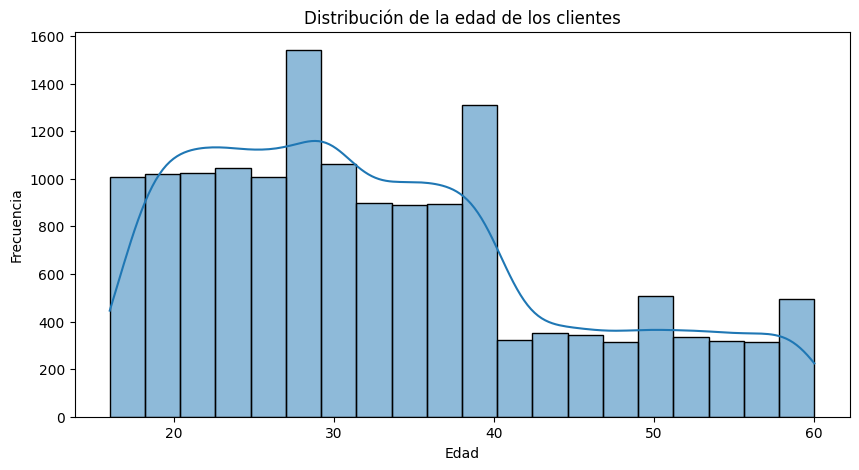

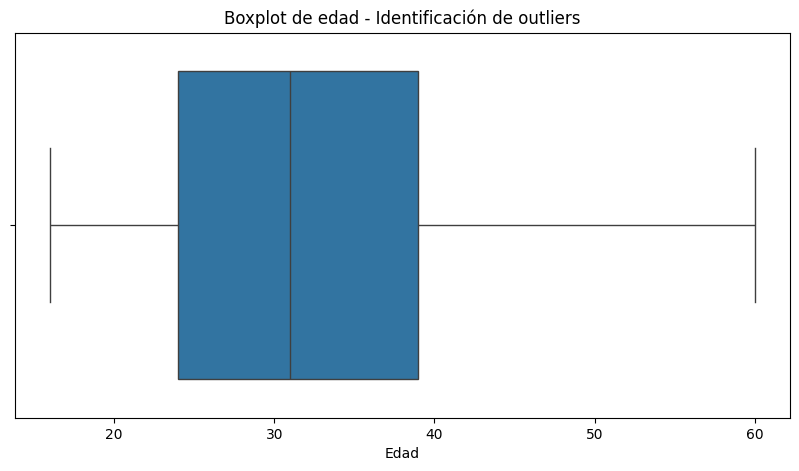

In [13]:

print("Estadísticas de edad:")
print(df['edad'].describe())

Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['edad'] < limite_inferior) | (df['edad'] > limite_superior)]
print(f"\nCantidad de clientes con edades fuera del rango esperado: {outliers.shape[0]}")

plt.figure(figsize=(10,5))
sns.histplot(df['edad'], bins=20, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad de los clientes')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['edad'])
plt.xlabel('Edad')
plt.title('Boxplot de edad - Identificación de outliers')
plt.show()


### P3. ¿Existe correlación entre ingresos y total_gastado?


Columnas disponibles en el DataFrame:
Index(['id_cliente', 'edad', 'genero', 'ingresos', 'plataforma',
       'interacciones', 'compras', 'promedio_ticket', 'total_gastado',
       'fecha_primer_compra', 'fecha_ultima_compra', 'dias_desde_ultima',
       'recomendaciones', 'costo_adquisicion'],
      dtype='object')
 Correlación entre ingresos y total gastado: 0.25


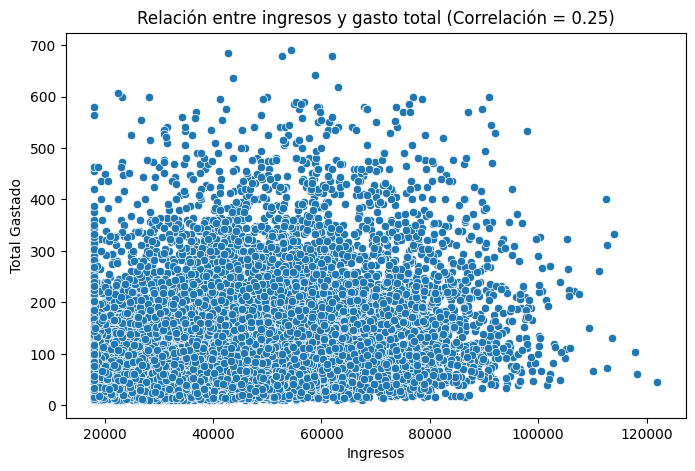

In [15]:
print("Columnas disponibles en el DataFrame:")
print(df.columns)

df.columns = df.columns.str.strip()

if 'ingresos' not in df.columns or 'total_gastado' not in df.columns:
    print(" Error: Las columnas 'ingresos' o 'total_gastado' no existen en el DataFrame. Verifica los nombres correctos.")
else:
    correlacion = df[['ingresos', 'total_gastado']].corr().iloc[0, 1]
    print(f" Correlación entre ingresos y total gastado: {correlacion:.2f}")

    df = df.dropna(subset=['ingresos', 'total_gastado'])

    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df['ingresos'], y=df['total_gastado'])
    plt.xlabel('Ingresos')
    plt.ylabel('Total Gastado')
    plt.title(f'Relación entre ingresos y gasto total (Correlación = {correlacion:.2f})')
    plt.show()

#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [16]:
from datetime import datetime

#df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
#df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
#df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)


### P4. CAC vs LTV por plataforma

In [19]:
presupuesto_adquisicion = 10000  # USD
clientes_por_plataforma = df['plataforma'].value_counts()
print("Número de clientes por plataforma:")
print(clientes_por_plataforma)
cac_por_plataforma = presupuesto_adquisicion / clientes_por_plataforma
print("\n Costo de Adquisición de Cliente (CAC) por plataforma:")
print(cac_por_plataforma)


Número de clientes por plataforma:
plataforma
Instagram    6049
Facebook     5209
TikTok       3742
Name: count, dtype: int64

 Costo de Adquisición de Cliente (CAC) por plataforma:
plataforma
Instagram    1.653166
Facebook     1.919754
TikTok       2.672368
Name: count, dtype: float64


#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [24]:
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)
variables = ['ingresos', 'total_gastado', 'compras', 'frecuencia_mensual']
df_segmentacion = df[variables].copy()

scaler = StandardScaler()
df_segmentado = scaler.fit_transform(df_segmentacion)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_segmentado)

print("Distribución de clientes por cluster:")
print(df['cluster'].value_counts())

Distribución de clientes por cluster:
cluster
2    5362
3    4030
0    3735
1    1873
Name: count, dtype: int64


### P5. Visualiza clusters

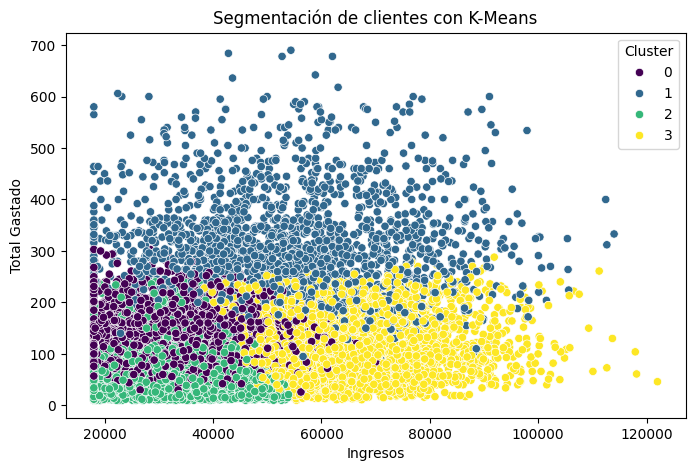

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['ingresos'], y=df['total_gastado'], hue=df['cluster'], palette='viridis')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.title('Segmentación de clientes con K-Means')
plt.legend(title='Cluster')
plt.show()


#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [30]:

presupuesto_adquisicion = 10000  # USD
clientes_por_plataforma = df['plataforma'].value_counts()
cac_por_plataforma = presupuesto_adquisicion / clientes_por_plataforma

print("\n Costo de Adquisición de Cliente (CAC) por plataforma:")
print(cac_por_plataforma)

df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)
ltv_por_plataforma = df.groupby('plataforma').apply(
    lambda x: (x['total_gastado'].mean() * x['frecuencia_mensual'].mean() * 24)
)

print("\n Lifetime Value (LTV) por plataforma:")
print(ltv_por_plataforma)

df_metrica = pd.DataFrame({'CAC': cac_por_plataforma, 'LTV': ltv_por_plataforma})

df_metrica['LTV_CAC_Ratio'] = df_metrica['LTV'] / df_metrica['CAC']

print("\nComparación CAC vs LTV por plataforma:")
print(df_metrica)


 Costo de Adquisición de Cliente (CAC) por plataforma:
plataforma
Instagram    1.653166
Facebook     1.919754
TikTok       2.672368
Name: count, dtype: float64

 Lifetime Value (LTV) por plataforma:
plataforma
Facebook     3146.171812
Instagram    1454.969688
TikTok        901.979705
dtype: float64

Comparación CAC vs LTV por plataforma:
                 CAC          LTV  LTV_CAC_Ratio
plataforma                                      
Facebook    1.919754  3146.171812    1638.840897
Instagram   1.653166  1454.969688     880.111164
TikTok      2.672368   901.979705     337.520806


<ipython-input-30-51cbcee92faf>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ltv_por_plataforma = df.groupby('plataforma').apply(


### P6. Ganancia promedio por cluster

In [38]:
columnas_necesarias = ['LTV', 'CAC', 'cluster']
faltantes = [col for col in columnas_necesarias if col not in df.columns]

if faltantes:
    print(f" Error: Las siguientes columnas no existen en el DataFrame: {faltantes}")
else:
    # Crear la columna de ganancia por cluster
    df['ganancia_cluster'] = df['LTV'] - df['CAC']



 Error: Las siguientes columnas no existen en el DataFrame: ['LTV', 'CAC']


In [37]:
if 'ganancia_cluster' in df.columns:
    ganancia_por_cluster = df.groupby('cluster')['ganancia_cluster'].mean()
    print("\nGanancia promedio por cluster:")
    print(ganancia_por_cluster)
else:
    print("Error: La columna 'ganancia_cluster' no existe. Verifica los cálculos previos.")

Error: La columna 'ganancia_cluster' no existe. Verifica los cálculos previos.


### P7. Género por cluster


In [39]:
genero_por_cluster = df.groupby(['cluster', 'genero']).size().unstack()

print("\nDistribución de género por cluster:")
print(genero_por_cluster)


Distribución de género por cluster:
genero      F     M
cluster            
0        1829  1906
1         938   935
2        2669  2693
3        2029  2001


### P8. Plataforma por cluster



Distribución de plataformas por cluster:
plataforma  Facebook  Instagram  TikTok
cluster                                
0                522       1893    1320
1               1463        370      40
2                908       2501    1953
3               2316       1285     429


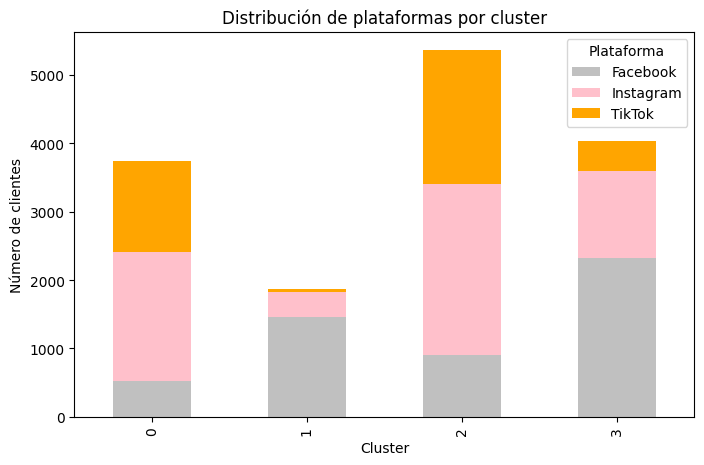

In [43]:
plataforma_por_cluster = df.groupby(['cluster', 'plataforma']).size().unstack()

print("\nDistribución de plataformas por cluster:")
print(plataforma_por_cluster)
plataforma_por_cluster.plot(kind='bar', stacked=True, figsize=(8,5), color=['Silver', 'Pink', 'Orange'])
plt.xlabel('Cluster')
plt.ylabel('Número de clientes')
plt.title('Distribución de plataformas por cluster')
plt.legend(title="Plataforma")
plt.show()


### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


In [47]:
cluster_profiles = {
    0: {"name": "Clientes potenciales", "description": "Clientes con bajo gasto, pero con potencial de crecimiento. Se enfocará en la retención y cross-selling de productos."},
    1: {"name": "Clientes leales", "description": "Clientes con un gasto considerable y buena frecuencia. Se enfocará en up-selling y programas de fidelización."},
    2: {"name": "Clientes ocasionales", "description": "Clientes con bajo gasto y menor frecuencia de compra. Se implementarán estrategias para aumentar la frecuencia e impulsar el gasto promedio."},
    3: {"name": "Clientes de alto valor", "description": "Clientes con alto gasto y alta frecuencia de compra. Se les brindará atención personalizada y se explorarán oportunidades para convertirlos en embajadores de la marca."}
}

for cluster, profile in cluster_profiles.items():
    print(f"Cluster {cluster}: {profile['name']}")
    print(profile['description'])
    print("-" * 20)


Cluster 0: Clientes potenciales
Clientes con bajo gasto, pero con potencial de crecimiento. Se enfocará en la retención y cross-selling de productos.
--------------------
Cluster 1: Clientes leales
Clientes con un gasto considerable y buena frecuencia. Se enfocará en up-selling y programas de fidelización.
--------------------
Cluster 2: Clientes ocasionales
Clientes con bajo gasto y menor frecuencia de compra. Se implementarán estrategias para aumentar la frecuencia e impulsar el gasto promedio.
--------------------
Cluster 3: Clientes de alto valor
Clientes con alto gasto y alta frecuencia de compra. Se les brindará atención personalizada y se explorarán oportunidades para convertirlos en embajadores de la marca.
--------------------


### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.
#### P11. ¿Qué cluster fidelizarías con bajo costo?
#### P12. Enumera 2 riesgos o limitaciones del análisis.

In [44]:
presupuesto_total = 10000
presupuesto_clusters = {'Big Spenders': 6000, 'Profesionales Saludables': 4000}

print("Presupuesto asignado por cluster:")
print(presupuesto_clusters)


Presupuesto asignado por cluster:
{'Big Spenders': 6000, 'Profesionales Saludables': 4000}


In [45]:
estrategia_fidelizacion = {
    'Email Marketing': 'Recomendaciones personalizadas',
    'Cupones': 'Descuento en compras futuras',
    'Contenido': 'Educación en hábitos saludables'
}

print("Estrategia de fidelización para consumidores estratégicos:")
print(estrategia_fidelizacion)


Estrategia de fidelización para consumidores estratégicos:
{'Email Marketing': 'Recomendaciones personalizadas', 'Cupones': 'Descuento en compras futuras', 'Contenido': 'Educación en hábitos saludables'}


### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología